In [1]:
classes = ["rumor","non-rumor"]
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):
    plt.rc("font",family='DroidSans')
    #plt.figure(figsize=(6, 4), dpi=200)
    np.set_printoptions(precision=2)
   
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=60)
    plt.yticks(xlocations, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
    #plt.savefig(savename, format='png')
def show_matrix(name):
    cm = np.load(name+'.npz')['matrix']

    plot_confusion_matrix(cm,name+'.png',name+' Confusion Matrix')

In [2]:
import os
import pandas as pd
import regex as re 
report_dir = "report_csv/report_formal.csv"
#BERT_dir = "../Bert-Chinese-Text-Classification-Pytorch"
report_csv = pd.read_csv(report_dir)

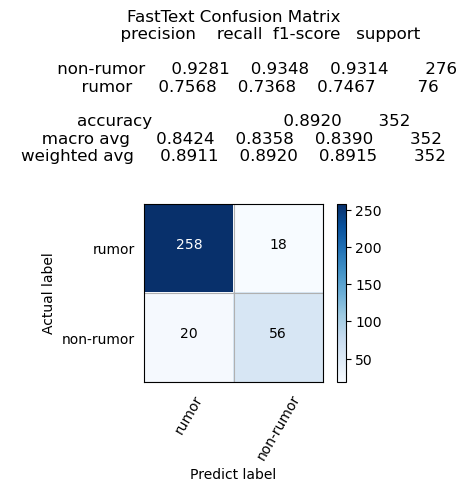

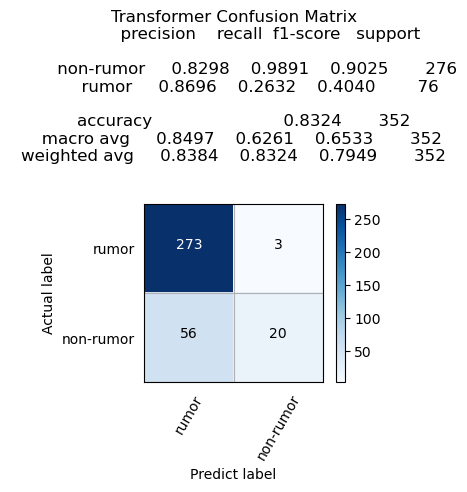

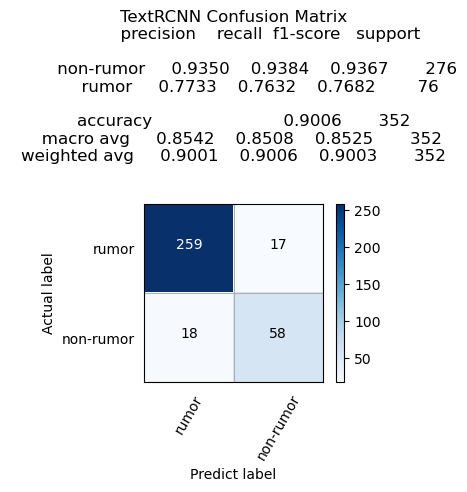

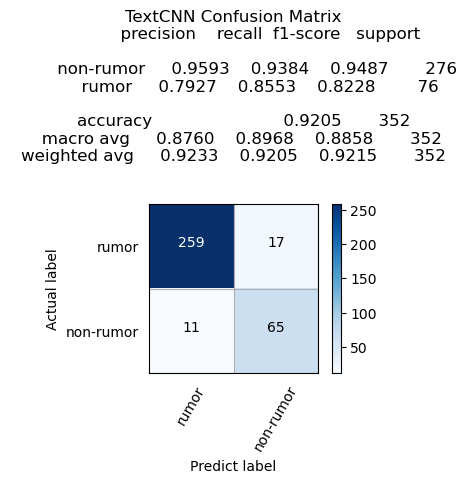

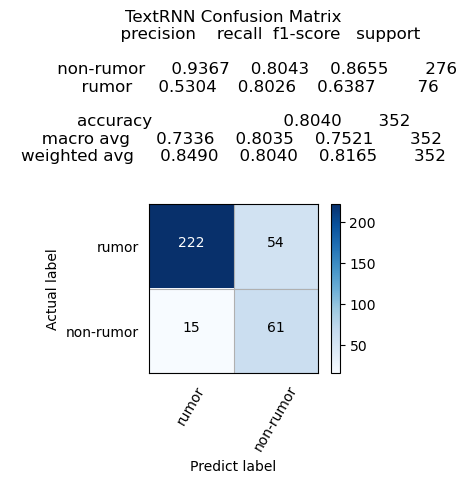

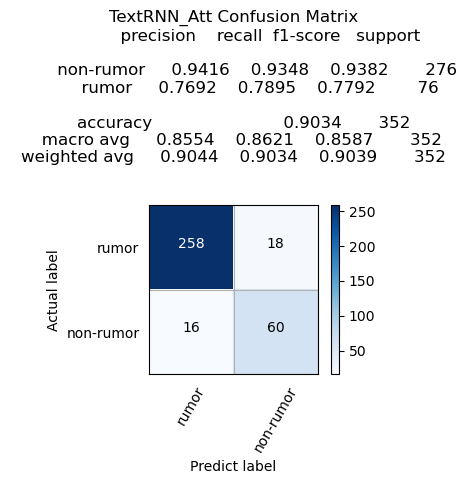

In [19]:
for i in range(len(report_csv)):
    plt.figure(figsize=(10,10),dpi=100)
    plt.subplot(3,3,i+1)
    cm = report_csv.iloc[i].
    with open(FastText_dir+'/'+npzs1[i][:-4]+'.txt')as f:
        txt = f.read()
        txt = re.sub(r'非谣言','non-rumor',txt)
        txt = re.sub(r'谣言','rumor',txt)

    plot_confusion_matrix(cm,npzs1[i][:-4]+'.png',npzs1[i][:-4]+' Confusion Matrix\n'+txt)

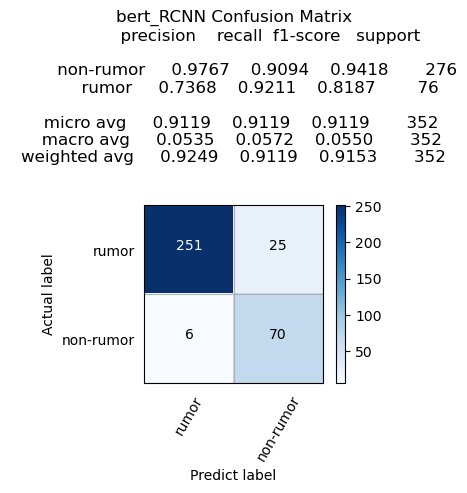

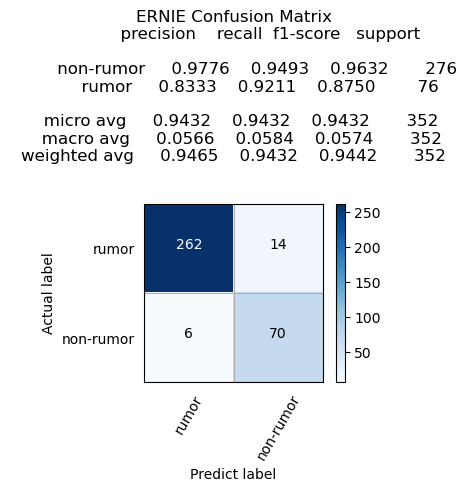

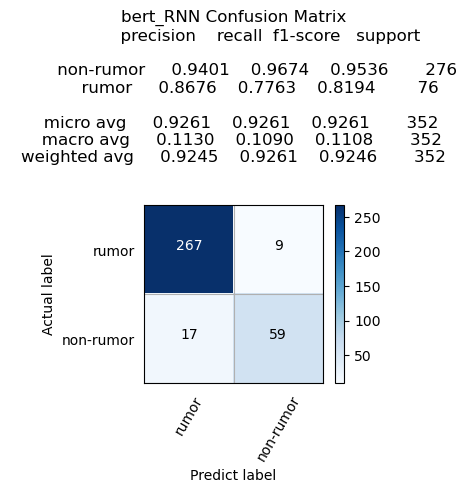

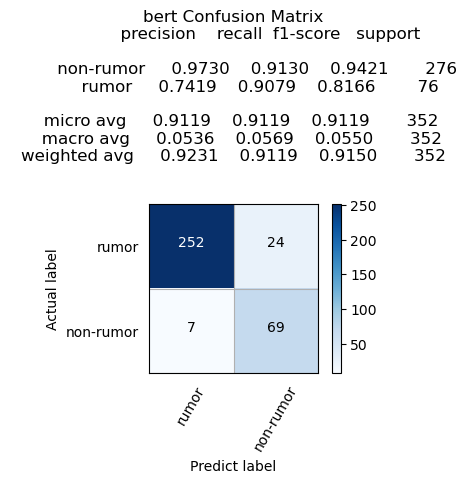

In [20]:
for i in range(len(npzs2)):
    plt.figure(figsize=(10,10),dpi=100)
    plt.subplot(3,3,i+1)
    cm = np.load(BERT_dir+'/'+npzs2[i])['matrix']
    with open(BERT_dir+'/'+npzs2[i][:-4]+'.txt')as f:
        txt = f.read()
        txt = re.sub(r'非谣言','non-rumor',txt)
        txt = re.sub(r'谣言','rumor',txt)
    plot_confusion_matrix(cm,npzs2[i][:-4]+'.png',npzs2[i][:-4]+' Confusion Matrix\n'+txt)
